


Epoch 1/100

40/40 [==============================] - 2s 3ms/step - loss: 0.0211
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 13/100
40/40 [=============

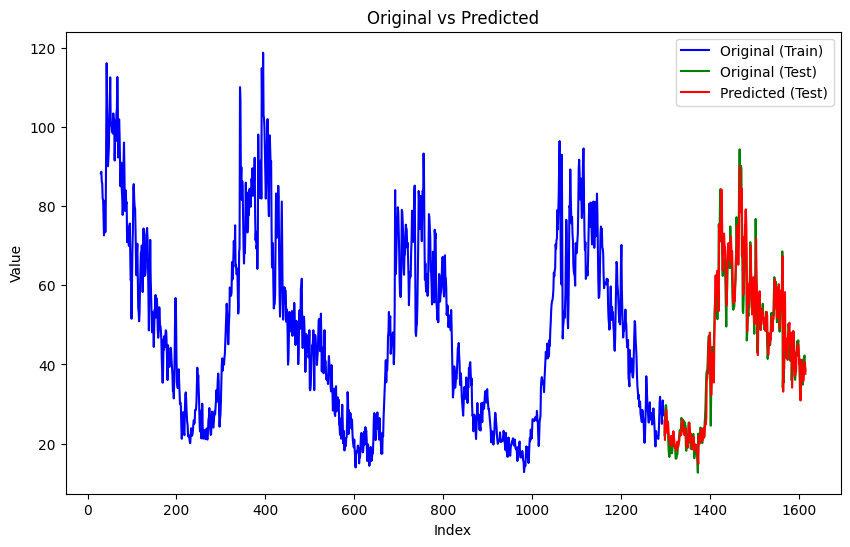

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\mohni\OneDrive - SSN Trust\Vscode\Datasets\Air_quality.csv")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['value_normalized'] = scaler.fit_transform(df['value'].values.reshape(-1,1))

# Define the number of timesteps
n_steps = 30

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the train data
X, y = prepare_data(df['value_normalized'].values, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(n_steps,),return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu' , return_sequences=False),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

print("Test Loss:", loss)

# Make predictions on the test set
predictions_normalized = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions_normalized)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index[n_steps:len(X_train) + n_steps], df['value'][n_steps:len(X_train) + n_steps], label='Original (Train)', color='blue')
plt.plot(df.index[len(X_train) + n_steps:], df['value'][len(X_train) + n_steps:], label='Original (Test)', color='green')
plt.plot(df.index[len(X_train) + n_steps:], predictions, label='Predicted (Test)', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Predicted')
plt.legend()
plt.show()


In [2]:

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(df['value'][len(X_train) + n_steps:], predictions)
print("R-squared:", r_squared)



R-squared: 0.9202718358714809


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.0134
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 13/100
50/50 [=================

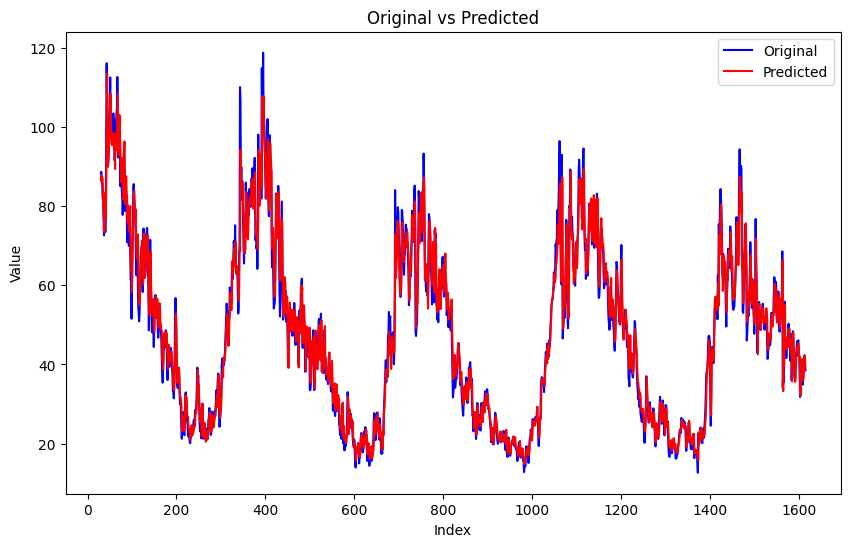

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\mohni\OneDrive - SSN Trust\Vscode\Datasets\Air_quality.csv")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['value_normalized'] = scaler.fit_transform(df['value'].values.reshape(-1,1))

# Define the number of timesteps
n_steps = 30

# Prepare the data for NN
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the train data
X_train, y_train = prepare_data(df['value_normalized'].values, n_steps)

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(n_steps,),return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu',return_sequences=False),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions_normalized = model.predict(X_train)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions_normalized)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index[n_steps:], df['value'][n_steps:], label='Original', color='blue')
plt.plot(df.index[n_steps:], predictions, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Predicted')
plt.legend()
plt.show()


1/1 [==============================] - 0s 56ms/step


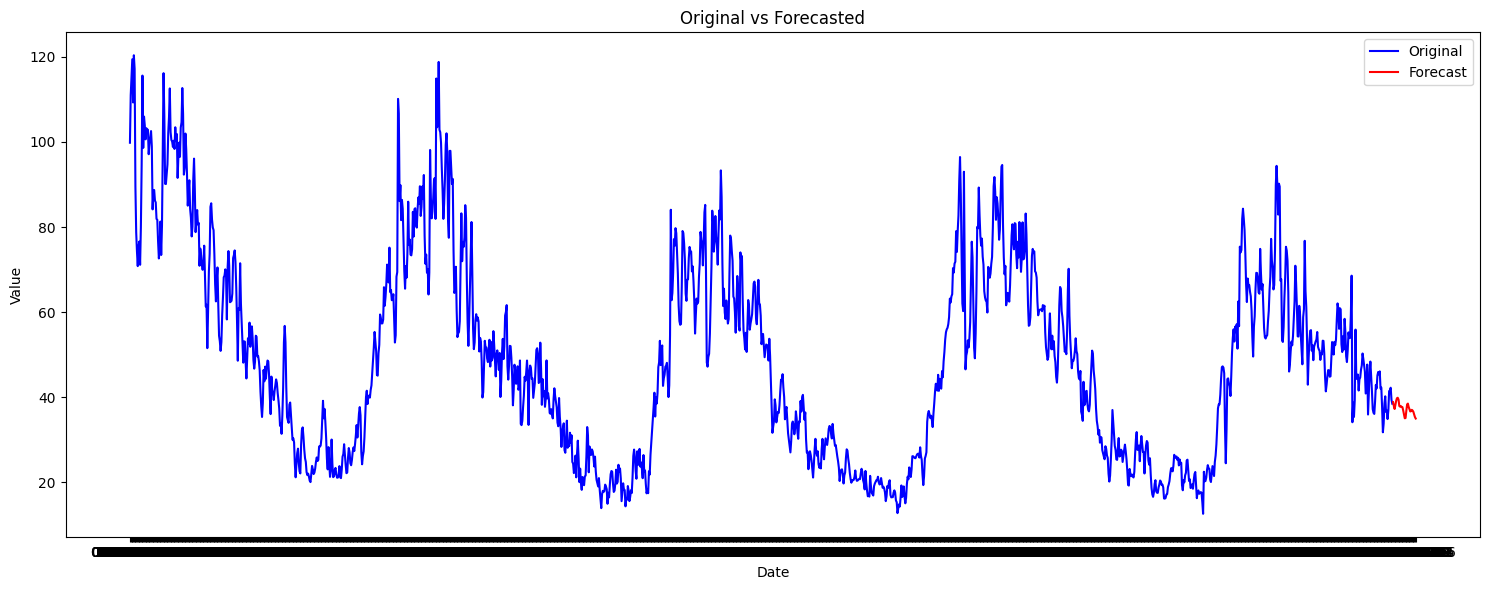

In [4]:
# Forecast 30 values into the future
future_forecast = []

# Take the last sequence from the training data
last_sequence = X_train[-1]

# Predict the next 30 values
for _ in range(30):
    # Predict the next value
    next_pred_normalized = model.predict(last_sequence.reshape(1, n_steps))
    future_forecast.append(next_pred_normalized[0][0])
    
    # Update the last sequence by removing the first value and adding the predicted value
    last_sequence = np.append(last_sequence[1:], next_pred_normalized)

# Inverse transform the forecasted values to the original scale
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))


# Generate date range for the forecasted values
last_date = pd.to_datetime(df['Date'].iloc[-1])
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Convert forecast_dates to strings
forecast_dates_str = forecast_dates.strftime('%Y-%m-%d')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['value'], label='Original', color='blue')
plt.plot(forecast_dates_str, future_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs Forecasted')
plt.legend()
plt.tight_layout()
plt.show()




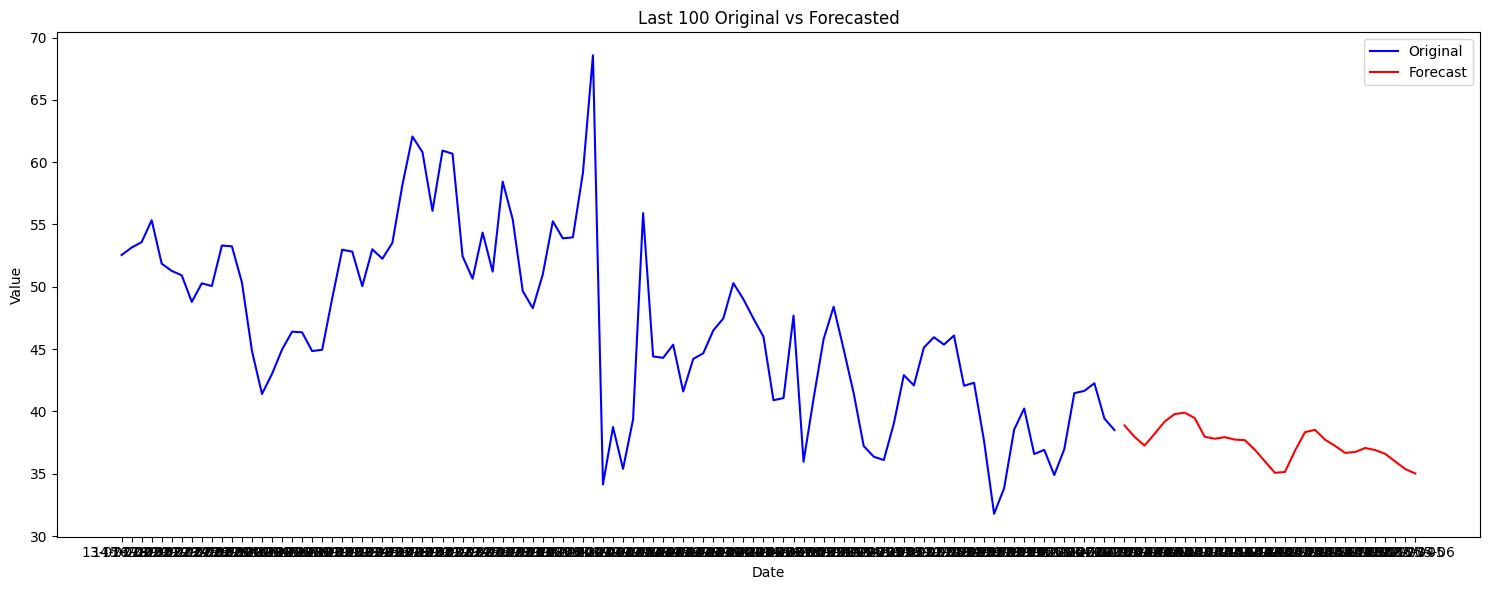

In [5]:
# Plotting the last 100 data points separately
plt.figure(figsize=(15, 6))
plt.plot(df['Date'][-100:], df['value'][-100:], label='Original', color='blue')
plt.plot(forecast_dates_str[-100:], future_forecast[-100:], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Last 100 Original vs Forecasted')
plt.legend()
plt.tight_layout()
plt.show()
